# Background

The problem of residence is one of the kernel problems for people all over the world, and it is a lay store not only by politicians but also by common people from eastern and western. As a survival necessity, a house is what people have to concern about in daily life. In order to live in a cost-efficient house, people come out with various methods to get the latest information about a new dwelling nearby, to purchase an apartment with the best value, or to renovate an old house. If there is one thing that can associate all people around the globe, that is people’s eagerness to live better. Now, for people who are willing to search for a new location to live, without appropriate sources to approach the latest and reliable information about high-quality houses on sale, they have to spend a large sum of agent fees on entrusting some agencies to handle specific affairs for them. However, if there is software for them to input their objective values into it and output their desired house, they might be able to save this money. Similarly, if a house-owner is going to sell his house, with this software, he is able to estimate how much he will earn. At the same time, from analyzing the house price, researchers will obtain the developing trend of housing prices in specific areas. All those significances appeal to us to conduct this research.   
 
The United States, as one of the biggest developed countries in the world, cannot get rid of this universal issue of solving housing problem, and its situation in residence has the typical features and important research significance, which lead us to focus on the capital city of the United States, Washington D.C., as the object to explore.  
 
Due to the District of Columbia retrocession, the city has a total area of 68.34 square miles (177.0 km2) with an estimated population of 702,455 people and has been growing since 2000 following a half-century of population decline. The city is highly segregated and features a high cost of living. In 2017, the average price of a single-family home in the district was $649,000. This dataset provides insight into the housing stock of the district. Because of this city’s approximate rectangle shape, Washington D.C. makes itself easily to be located in a coordinate axis, so that houses in D.C. are able to be grouped and analyzed by their locations.


# Dive into Data

## Set up Environment 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('DC_Properties.csv')
raw_data.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


## Data Overview

The data we use is the D.C. Residential Properties in 2018, provided by D.C.  Geographic Information System. This dataset illustrated sales price on the property level and includes sales price, household characteristics and geographical information. We will use the household characteristics and geographical information to forecast the corresponding sales price. As for all the metrics, we will also figure out the most significant factors to determine the sales price. 

This dataset includes 158957 observations from samples around the D.C. as well as 49 variables. It contains a considerable sample size with multiple dimensions, including sales price, household characteristics and geographical information. Many variables of household characteristics in the dataset are categorical data but not numerical data. For example, this data set uses “Row Inside”, “single”, “Semi-Detached”, “Row End”, “Multi”, “Town Inside”, “Town End”, “Default”, “Vacant Land” to identify different kinds of house structure. Moreover, some variables in the dataset may be correlated with each other, such as GBA (Grossing Building Area) and the total amount of each room types, both of which illustrates the degree of area of each observation. To solve this problem, we will first test their correlation and define ways to reflect such relationship. We will use selected variables by content to train our model in avoid of multicollinearity.

In [3]:
import pandas_profiling

pandas_profiling.ProfileReport(raw_data)

Number of variables,49
Number of observations,158957
Total Missing (%),15.4%
Total size in memory,59.4 MiB
Average record size in memory,392.0 B
Numeric,23
Categorical,23
Boolean,0
Date,0
Text (Unique),0
Rejected,3


According to the automated report from pandas_profiling, the problem awaiting includes high cardinality, missing values and extreme noise. In order to reach a model with high performance, we must solve them before training.

In [4]:
raw_data.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

Histograms gives more direct perception towards skewed ditribution. For example, it can be seen that data like GBA, rooms, kitchens are highly skewed. Most of these are in a reasonable range, but still some are at extreme scale.

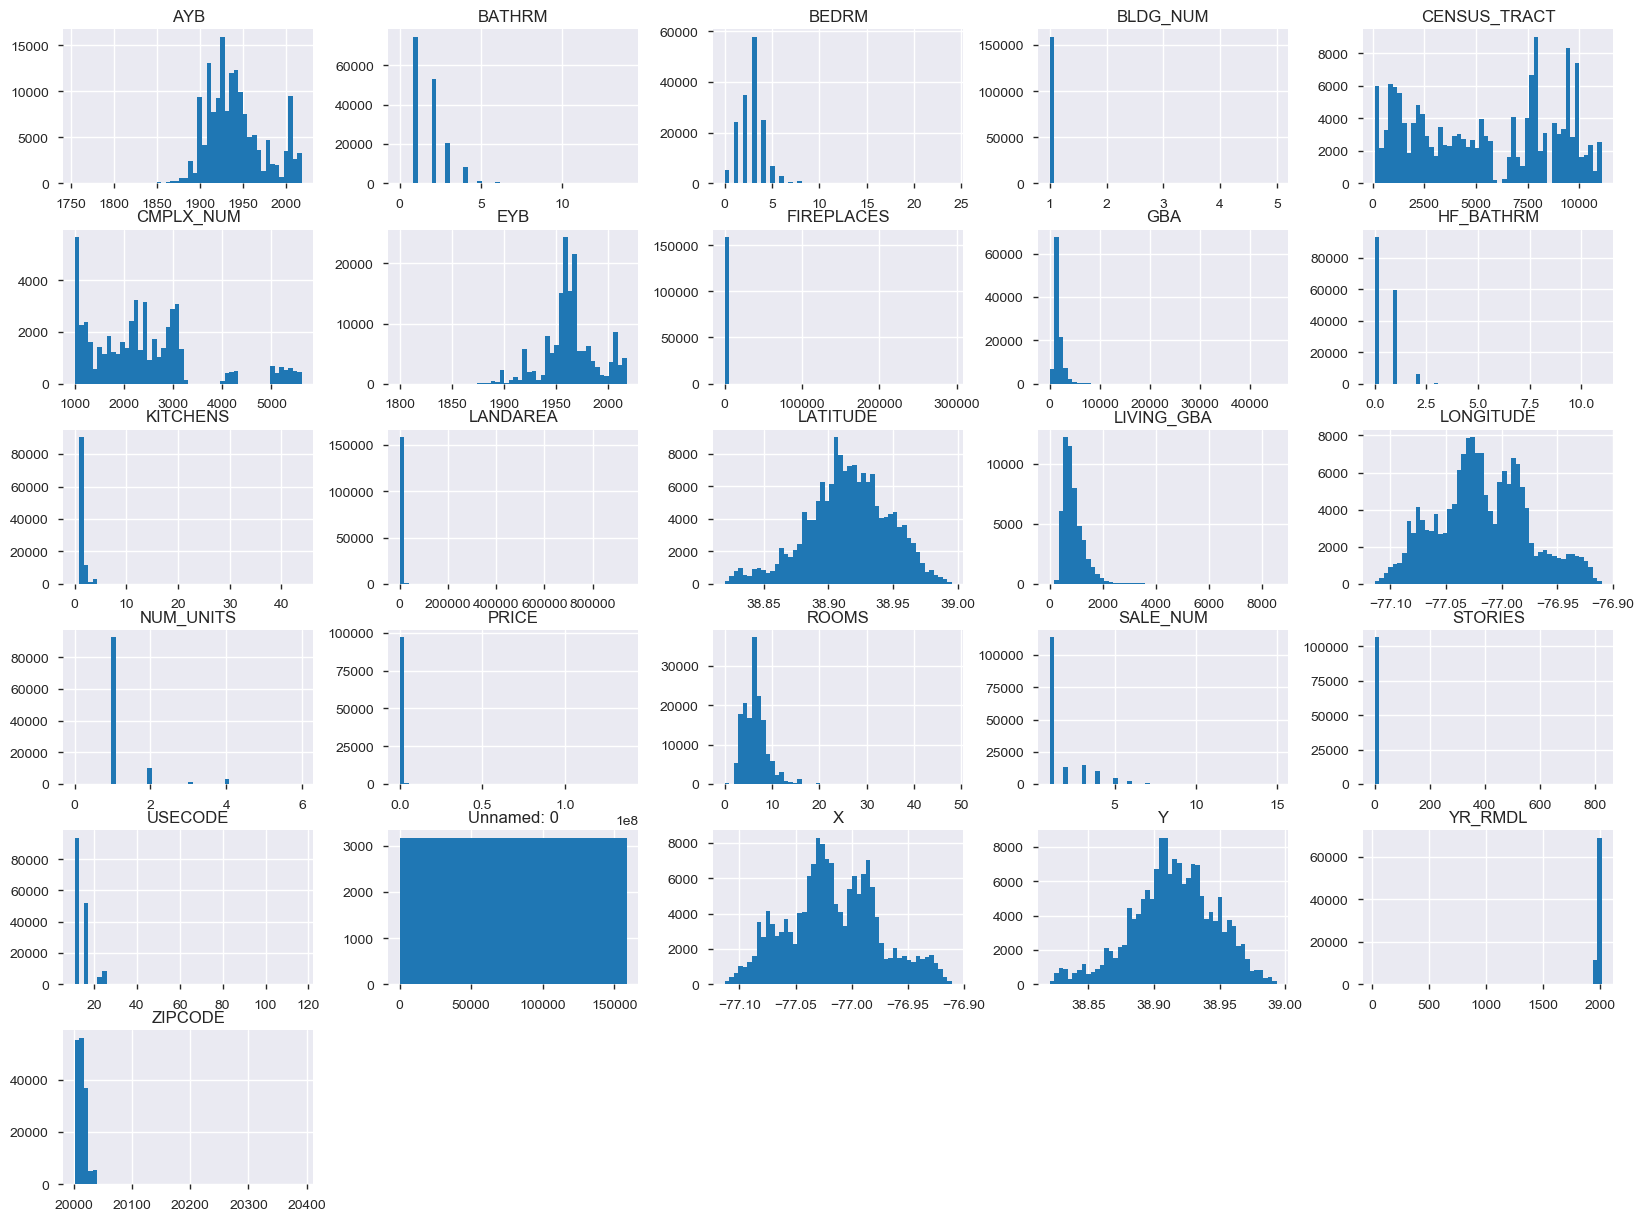

In [5]:
raw_data.hist(bins=50,figsize=(20,15))
plt.show()

# Data Cleaning 

## Feature Selection

Looking through the data, there are some parameters that are unimportant, or some represent the same meaning. Thus, we decided to omit them.

Since in the dataset, we only analyze the data inside Washington city and at the same time we can get access of the specific longitude and latitude, thus, we can delete columns like "usecode", "zipcode", "city", etc, that represented similar geographical information.

In [6]:
# Remove duplicated features

data_cleaned = raw_data.drop(['X','Y'],axis=1)

In [7]:
# Remove Code Axis

data_cleaned = data_cleaned.drop(['USECODE','ZIPCODE','SALE_NUM','NUM_UNITS','BLDG_NUM'],axis=1)

In [8]:
# Remove Redundent geographical informaition that could be represented by longitude and latitude

data_cleaned = data_cleaned.drop(['ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','FULLADDRESS','CITY','STATE','NATIONALGRID','SQUARE'],axis=1)

In [9]:
# Remove Original Index

data_cleaned = data_cleaned.iloc[:,1:]

In [10]:
# Remove Census Related Columns

data_cleaned = data_cleaned.drop(['CENSUS_TRACT','CENSUS_BLOCK'],axis=1)

In the dataset, we can find that the column "STORIES" and "STYLE" represent the same information - that is an important feature of each house - the stories. Thus, we can delete the "STYLE" column.

In [11]:
data_cleaned.loc[:,('STORIES','STYLE')].head(10)

,STORIES,STYLE
0,3.0,3 Story
1,3.0,3 Story
2,3.0,3 Story
3,3.0,3 Story
4,3.0,3 Story
5,4.0,4 Story
6,2.0,2 Story
7,3.0,3 Story
8,2.0,2 Story
9,2.0,2 Story


In [12]:
# Remove Redundent Features

data_cleaned = data_cleaned.drop(['STYLE'],axis=1)

After the cleaning above, we can find that there are about half of the data that can be used.

In [13]:
data_cleaned['GIS_LAST_MOD_DTTM'].value_counts()

2018-07-22 18:01:43    106696
2018-07-22 18:01:38     52261
Name: GIS_LAST_MOD_DTTM, dtype: int64

In the "GIS_LAST_MOD_DTTM" column, we can find that all the data are the same and it represents the time that the form was created. It is of no use in this analysis so we decide to delete this column.

In [14]:
# Remove timestaple

data_cleaned = data_cleaned.drop(['GIS_LAST_MOD_DTTM'],axis=1)

In [15]:
data_cleaned.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,KITCHENS,FIREPLACES,LANDAREA,SOURCE,CMPLX_NUM,LIVING_GBA,LATITUDE,LONGITUDE,WARD,QUADRANT
0,4,0,Warm Cool,Y,8,4,1910.0,1988.0,1972,3.0,...,2.0,5,1680,Residential,NaN,NaN,38.914680,-77.040832,Ward 2,NW
1,3,1,Warm Cool,Y,11,5,1898.0,2007.0,1972,3.0,...,2.0,4,1680,Residential,NaN,NaN,38.914683,-77.040764,Ward 2,NW
2,3,1,Hot Water Rad,Y,9,5,1910.0,2009.0,1984,3.0,...,2.0,4,1680,Residential,NaN,NaN,38.914684,-77.040678,Ward 2,NW
3,3,1,Hot Water Rad,Y,8,5,1900.0,2003.0,1984,3.0,...,2.0,3,1680,Residential,NaN,NaN,38.914683,-77.040629,Ward 2,NW
4,2,1,Warm Cool,Y,11,3,1913.0,2012.0,1985,3.0,...,1.0,0,2032,Residential,NaN,NaN,38.914383,-77.039361,Ward 2,NW


## Convert Objective Features 

After initial data cleaning, high cardinality is the second problems we are facing. Let's take a glance at where the categorical features are by checking data types and then take a closer look on them.

In [16]:
data_cleaned.dtypes

BATHRM          int64
HF_BATHRM       int64
HEAT           object
AC             object
ROOMS           int64
BEDRM           int64
AYB           float64
YR_RMDL       float64
EYB             int64
STORIES       float64
SALEDATE       object
PRICE         float64
QUALIFIED      object
GBA           float64
STRUCT         object
GRADE          object
CNDTN          object
EXTWALL        object
ROOF           object
INTWALL        object
KITCHENS      float64
FIREPLACES      int64
LANDAREA        int64
SOURCE         object
CMPLX_NUM     float64
LIVING_GBA    float64
LATITUDE      float64
LONGITUDE     float64
WARD           object
QUADRANT       object
dtype: object

And now, it is time to go through these categorical features one by one. 

When we consider the "HEAT" column, there are totally 14 types. However, there are 10 types that only account for a small proportion in the dataset. In order to better focus on the majority types, we decided to groups the following types - 'Wall Furnace','Water Base Brd','Elec Base Brd','No Data','Electric Rad','Gravity Furnac','Air-Oil','Ind Unit','Evp Cool','Air Exchng' into one - Others.

In [17]:
data_cleaned['HEAT'].value_counts()

Forced Air        53972
Hot Water Rad     47202
Warm Cool         33628
Ht Pump           21412
Wall Furnace       1120
Water Base Brd      402
Elec Base Brd       351
No Data             330
Electric Rad        144
Gravity Furnac      140
Air-Oil             117
Ind Unit             50
Evp Cool             50
Air Exchng           39
Name: HEAT, dtype: int64

In [18]:
data_cleaned['HEAT'].replace(['Wall Furnace','Water Base Brd','Elec Base Brd','No Data','Electric Rad','Gravity Furnac','Air-Oil','Ind Unit',
          'Evp Cool','Air Exchng'],'Others',inplace=True)
data_cleaned['HEAT'].value_counts()

Forced Air       53972
Hot Water Rad    47202
Warm Cool        33628
Ht Pump          21412
Others            2743
Name: HEAT, dtype: int64

Looking through the "AC" column (Air conditioning), we can find that the data missing only accounts for a negligible part. We decided to view them as "No air conditioner".

In [19]:
data_cleaned['AC'].value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

In [20]:
data_cleaned['AC'].replace('Y',1,inplace=True)
data_cleaned['AC'].replace(['N','0'],0,inplace=True)
data_cleaned['AC'].value_counts()

1    114620
0     44337
Name: AC, dtype: int64

The data of Saledate are saved in strings, so first transform it into datetime. Considering we are looking at nearly a century's data, the exact date and time can be neglected. So after extracting year, other data can be discarded. 

In [21]:
data_cleaned['SALEDATE'] = pd.to_datetime(data_cleaned['SALEDATE'],format = '%Y-%m-%d %H:%M:%S')
data_cleaned['SALEYEAR'] = data_cleaned['SALEDATE'].map(lambda x:x.year)
data_cleaned = data_cleaned.drop(['SALEDATE'],axis=1)

Change it to boolean value.

In [22]:
data_cleaned['QUALIFIED'].replace('Q',1,inplace=True)
data_cleaned['QUALIFIED'].replace('U',0,inplace=True)
data_cleaned['QUALIFIED'].value_counts()

0    82608
1    76349
Name: QUALIFIED, dtype: int64

When we consider the "STRUCT" column, there are totally 9 types. However, there are 4 types that only account for a small proportion in the dataset. In order to better focus on the majority types, we decided to gruops the following types - 'Town Inside','Town End','Default','Vacant Land' into one - Others.

In [23]:
data_cleaned['STRUCT'].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

In [24]:
data_cleaned['STRUCT'].replace(['Town Inside','Town End','Default','Vacant Land'],'Others',inplace=True)
data_cleaned['STRUCT'].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Others             333
Name: STRUCT, dtype: int64

Grade is ranked in a textual form. If we feed these categories to the model directly, the model is not able to figure out which group is better which means loss of information. To avoid this problem, we transform these textual grading into numerical grades in the order of low quality to high quality. From number 0-5, the higher the number is, the better the house is.

In [25]:
data_cleaned['GRADE'].value_counts()

Average          37357
Above Average    32101
Good Quality     20800
Very Good         8976
Excellent         3390
Superior          2634
Exceptional-A      818
Exceptional-B      278
Fair Quality       150
Exceptional-C       92
Exceptional-D       75
No Data             19
Low Quality          6
Name: GRADE, dtype: int64

In [26]:
data_cleaned['GRADE'].replace(['Low Quality','Fair Quality'],0,inplace=True)
data_cleaned['GRADE'].replace(['Average','No Data'],1,inplace=True)
data_cleaned['GRADE'].replace('Above Average',2,inplace=True)
data_cleaned['GRADE'].replace('Good Quality',3,inplace=True)
data_cleaned['GRADE'].replace(['Very Good','Excellent'],4,inplace=True)
data_cleaned['GRADE'].replace(['Superior','Exceptional-A','Exceptional-B','Exceptional-C','Exceptional-D'],5,inplace=True)
data_cleaned['GRADE'].value_counts()

1.0    37376
2.0    32101
3.0    20800
4.0    12366
5.0     3897
0.0      156
Name: GRADE, dtype: int64

Although fireplaces is a numerical attribute, it is highlt skewed that over a half of observations are 0, which makes it more like a categorical attribute. Thus it is better to transform it into a boolean categorical attribute which only represents if there is a fireplace or not.

In [27]:
data_cleaned['FIREPLACES'].value_counts()

0         103837
1          40567
2          10779
3           2410
4            841
5            277
6            148
7             47
8             18
9             10
10             8
11             3
12             3
13             3
4068           1
922            1
293920         1
1601           1
200            1
1017           1
Name: FIREPLACES, dtype: int64

In [28]:
data_cleaned.loc[data_cleaned['FIREPLACES'] > 0, 'FIREPLACES'] = 1
data_cleaned['FIREPLACES'].value_counts()

0    103837
1     55120
Name: FIREPLACES, dtype: int64

Like Grade, CNDTN (conditions) are stored in a textual form. Transform into numerics.

In [29]:
data_cleaned['CNDTN'].value_counts()

Average      58217
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64

In [30]:
data_cleaned['CNDTN'].replace(['Poor','Fair'],0,inplace=True)
data_cleaned['CNDTN'].replace(['Average','Default'],1,inplace=True)
data_cleaned['CNDTN'].replace(['Good'],2,inplace=True)
data_cleaned['CNDTN'].replace(['Very Good'],3,inplace=True)
data_cleaned['CNDTN'].replace(['Excellent'],4,inplace=True)
data_cleaned['CNDTN'].value_counts()

1.0    58236
2.0    37497
3.0     8130
0.0     1495
4.0     1338
Name: CNDTN, dtype: int64

As for the column'EXTWALL', we find 'Common brick' accounts for the majority, so we dicide to classify them into two groups -'Common brick' and 'others', 1 and 0 respectively. 

In [31]:
data_cleaned['EXTWALL'].value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
SPlaster              1
Rustic Log            1
Name: EXTWALL, dtype: int64

In [32]:
data_cleaned.loc[data_cleaned['EXTWALL'] != 'Common Brick','EXTWALL'] = 0
data_cleaned.loc[data_cleaned['EXTWALL'] == 'Common Brick','EXTWALL'] = 1
data_cleaned['EXTWALL'].value_counts()

1    81068
0    77889
Name: EXTWALL, dtype: int64

Similar to "STRUCT" column, we group 'ROOF' into five types.

In [33]:
data_cleaned['ROOF'].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

In [34]:
data_cleaned['ROOF'].replace(['Neopren','Shake','Clay Tile ', 'Shingle','Metal- Pre','Typical ','Composition Ro','Metal- Cpr',
                              'Clay Tile','Typical','Concrete Tile','Water Proof','Wood- FS','Concrete'],'Others',inplace=True)
data_cleaned['ROOF'].value_counts()

Built Up        31402
Comp Shingle    30301
Metal- Sms      29957
Slate           11135
Others           3901
Name: ROOF, dtype: int64

Similar to "STRUCT" column, we group 'INTWALL' into five types.

In [35]:
data_cleaned['INTWALL'].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Lt Concrete        141
Default            110
Ceramic Tile        50
Vinyl Comp          28
Parquet             19
Resiliant           15
Vinyl Sheet         13
Terrazo              6
Name: INTWALL, dtype: int64

In [36]:
data_cleaned['INTWALL'].replace(['Lt Concrete','Default','Ceramic Tile', 'Vinyl Comp','Parquet','Resiliant',
                                 'Vinyl Sheet','Terrazo'],'Others',inplace=True)
data_cleaned['INTWALL'].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Others             382
Name: INTWALL, dtype: int64

Save a checkpoint after cleaning.

In [37]:
data_cleaned.to_csv('cleaned.csv')

# Residential Housing Analysis

The original data set are conprised of residential and condominium housing data. And these data are conformed from different attributes. For example, GBA is a attribute only residential data have. And Living GBA is another attribute that only condominium data have. Therefore, it is better to divide the original dataset into two separate data set for further working.

In [38]:
residential = data_cleaned[data_cleaned['SOURCE']=='Residential']
condominium = data_cleaned[data_cleaned['SOURCE']=='Condominium']

We set a price limit of the visualized data to get rid of the extreme noise. It can be seen that most of the housing in the northwest are tinted into red which stands for high prices. On the other hand, Southeast are more in blue.

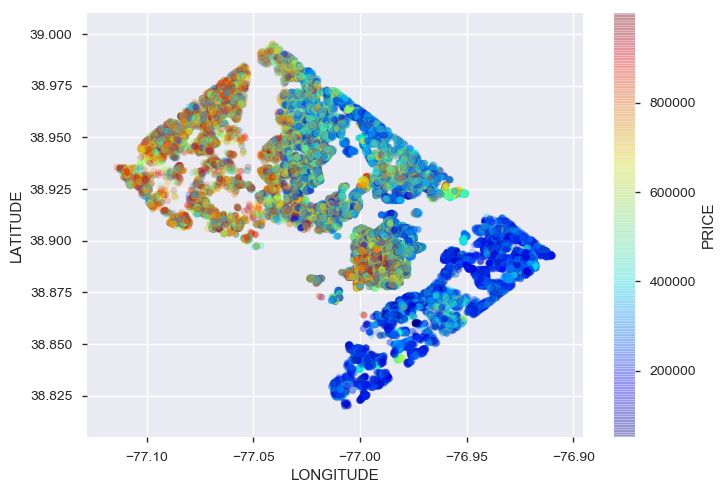

In [79]:
residential[residential['PRICE']<1000000].plot(kind='scatter',x='LONGITUDE',y='LATITUDE',alpha=0.2,
              c='PRICE',cmap=plt.get_cmap('jet'),colorbar=True)

## Deal with Missing Data

Let's see how many missing value is and their proportions.

In [40]:
data_cleaned.count()

BATHRM        158957
HF_BATHRM     158957
HEAT          158957
AC            158957
ROOMS         158957
BEDRM         158957
AYB           158686
YR_RMDL        80928
EYB           158957
STORIES       106652
PRICE          98216
QUALIFIED     158957
GBA           106696
STRUCT        106696
GRADE         106696
CNDTN         106696
EXTWALL       158957
ROOF          106696
INTWALL       106696
KITCHENS      106695
FIREPLACES    158957
LANDAREA      158957
SOURCE        158957
CMPLX_NUM      52261
LIVING_GBA     52261
LATITUDE      158956
LONGITUDE     158956
WARD          158956
QUADRANT      158720
SALEYEAR      132187
dtype: int64

In [41]:
residential.count()/len(residential)

BATHRM        1.000000
HF_BATHRM     1.000000
HEAT          1.000000
AC            1.000000
ROOMS         1.000000
BEDRM         1.000000
AYB           0.997741
YR_RMDL       0.461864
EYB           1.000000
STORIES       0.999588
PRICE         0.542663
QUALIFIED     1.000000
GBA           1.000000
STRUCT        1.000000
GRADE         1.000000
CNDTN         1.000000
EXTWALL       1.000000
ROOF          1.000000
INTWALL       1.000000
KITCHENS      0.999991
FIREPLACES    1.000000
LANDAREA      1.000000
SOURCE        1.000000
CMPLX_NUM     0.000000
LIVING_GBA    0.000000
LATITUDE      0.999991
LONGITUDE     0.999991
WARD          0.999991
QUADRANT      0.997779
SALEYEAR      0.788999
dtype: float64

We now look into the missing data for each column. The purpose of this analysis is to forecast the price, so we are not able to fill the missing values to preserve the model's value. We can only consider the houses with prices and discard those without a price.

In [42]:
residential.dropna(subset=['PRICE'],inplace=True)
residential.count()/len(residential)

BATHRM        1.000000
HF_BATHRM     1.000000
HEAT          1.000000
AC            1.000000
ROOMS         1.000000
BEDRM         1.000000
AYB           0.998359
YR_RMDL       0.573696
EYB           1.000000
STORIES       0.999430
PRICE         1.000000
QUALIFIED     1.000000
GBA           1.000000
STRUCT        1.000000
GRADE         1.000000
CNDTN         1.000000
EXTWALL       1.000000
ROOF          1.000000
INTWALL       1.000000
KITCHENS      0.999983
FIREPLACES    1.000000
LANDAREA      1.000000
SOURCE        1.000000
CMPLX_NUM     0.000000
LIVING_GBA    0.000000
LATITUDE      1.000000
LONGITUDE     1.000000
WARD          1.000000
QUADRANT      0.998256
SALEYEAR      0.999983
dtype: float64

Condering the column'AYB'(construction year), the missing data is not very much, so we dicide to use the average value to replace the missing data.

In [43]:
np.mean(residential['AYB'])

1934.5805726148258

In [44]:
residential['AYB'].fillna(1935,inplace=True)

As for this step, in order to consider the construction year and the repairing year together, we calculate the spread the between these two columns of years and obtain their average spread. Then we add the average spread to the construction year and get a new column of year.

In [45]:
cal_rmdl = residential.loc[:,('YR_RMDL','EYB')]
cal_rmdl.count()

YR_RMDL    33217
EYB        57900
dtype: int64

In [46]:
cal_rmdl.dropna(how='any',inplace=True)
cal_rmdl.count()

YR_RMDL    33217
EYB        33217
dtype: int64

In [47]:
cal_rmdl['ratio'] = cal_rmdl['YR_RMDL'] - cal_rmdl['EYB']
np.mean(cal_rmdl['ratio'])

34.87584670500045

In [48]:
residential['YR_RMDL'].fillna(0,inplace=True)

for i in range(len(residential)):
    if residential.iloc[i,7] == 0:
        if residential.iloc[i,8] > 1981:
            residential.iloc[i,7] == 2016
        else:
            residential.iloc[i,7] == residential.iloc[i,8]+35

In [49]:
residential.count()

BATHRM        57900
HF_BATHRM     57900
HEAT          57900
AC            57900
ROOMS         57900
BEDRM         57900
AYB           57900
YR_RMDL       57900
EYB           57900
STORIES       57867
PRICE         57900
QUALIFIED     57900
GBA           57900
STRUCT        57900
GRADE         57900
CNDTN         57900
EXTWALL       57900
ROOF          57900
INTWALL       57900
KITCHENS      57899
FIREPLACES    57900
LANDAREA      57900
SOURCE        57900
CMPLX_NUM         0
LIVING_GBA        0
LATITUDE      57900
LONGITUDE     57900
WARD          57900
QUADRANT      57799
SALEYEAR      57899
dtype: int64

Discard the attributes only condominium housing have.

In [50]:
residential.drop(['CMPLX_NUM','LIVING_GBA'],axis=1,inplace=True)

Considering the missing data for 'STORIES','KITCHENS','QUADRANT','SALEYEAR', we use modes to replace them.

In [51]:
residential['STORIES'].fillna(residential['STORIES'].mode()[0], inplace=True)
residential['KITCHENS'].fillna(residential['KITCHENS'].mode()[0], inplace=True)
residential['QUADRANT'].fillna(residential['QUADRANT'].mode()[0], inplace=True)
residential['SALEYEAR'].fillna(residential['SALEYEAR'].mode()[0], inplace=True)

In [52]:
residential.count()

BATHRM        57900
HF_BATHRM     57900
HEAT          57900
AC            57900
ROOMS         57900
BEDRM         57900
AYB           57900
YR_RMDL       57900
EYB           57900
STORIES       57900
PRICE         57900
QUALIFIED     57900
GBA           57900
STRUCT        57900
GRADE         57900
CNDTN         57900
EXTWALL       57900
ROOF          57900
INTWALL       57900
KITCHENS      57900
FIREPLACES    57900
LANDAREA      57900
SOURCE        57900
LATITUDE      57900
LONGITUDE     57900
WARD          57900
QUADRANT      57900
SALEYEAR      57900
dtype: int64

## Deal with extreme noise

In [53]:
np.percentile(residential['PRICE'],1)

52140.58

In [54]:
np.percentile(residential['PRICE'],99)

2700000.0

In [55]:
residential = residential[residential['PRICE']<2700000]
residential = residential[residential['PRICE']>52140]

## Sparsify Catergorical Features

Not all models are capable to deal with categorical features. Before training, categorical features must be transformed into sparse matrix.

In [56]:
residential_spar = pd.get_dummies(residential)

# Create Train and Test Set

Data set is splitted randomly into train and test set in the proportion of 4:1.

In [57]:
from sklearn.model_selection import train_test_split

X = residential_spar.drop('PRICE',axis=1)
y = residential_spar['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
len(X_train)/len(residential_spar)

0.7999858971194866

# Modelling and Evaluation

### Linear Regression

Linear regression is always the first model. And always not very promising considering the R2 Score. But it is a good standard to see how other models work.

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
lin_reg_score1=lin_reg.score(X_train,y_train)
lin_reg_score2=lin_reg.score(X_test,y_test)
lin_reg_score1

0.7832809782679544

In [206]:
lin_reg_score2

0.7835120427052122

In [61]:
from sklearn.metrics import mean_squared_error

lin_train_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, lin_train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

192211.47248041164

In [62]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, lin_train_pred)
lin_mae

134705.52351900033

### Decision Tree Regressor

The second model is a decision tree model. The result is better than the linear regression model.

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=15,random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [207]:
tree_reg_score1=tree_reg.score(X_train,y_train)
tree_reg_score1

0.968035219761883

In [208]:
tree_reg_score2=tree_reg.score(X_test,y_test)
tree_reg_score2

0.8100185460165048

In [97]:
dt_train_pred = tree_reg.predict(X_train)
dt_mse = mean_squared_error(y_train, dt_train_pred)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

73818.74397360998

In [98]:
dt_mae = mean_absolute_error(y_train, dt_train_pred)
dt_mae

43540.58595291151

### Random Forest Regressor

The second model is a random forest model, which ranks first.

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_depth=17,n_estimators=15,random_state=0)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [209]:
forest_reg_score1=forest_reg.score(X_train,y_train)
forest_reg_score1

0.9758444275475721

In [210]:
forest_reg_score2=forest_reg.score(X_test,y_test)
forest_reg_score2

0.8974412542100995

In [99]:
rf_train_pred = forest_reg.predict(X_train)
rf_mse = mean_squared_error(y_train, rf_train_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

64171.09602309222

In [100]:
rf_mae = mean_absolute_error(y_train, rf_train_pred)
rf_mae

39679.91786250686

### Performance Comparison

In [211]:
score_summary = pd.DataFrame({'Training Score':[lin_reg_score1,tree_reg_score1,forest_reg_score1],
                           'Testing Score':[lin_reg_score2,tree_reg_score2,forest_reg_score2]},
                          index=['Linear Regression','Decision Trees','Random Forest'])

In [212]:
score_summary

,Training Score,Testing Score
Linear Regression,0.783281,0.783512
Decision Trees,0.968035,0.810019
Random Forest,0.975844,0.897441


<Figure size 3000x3000 with 0 Axes>

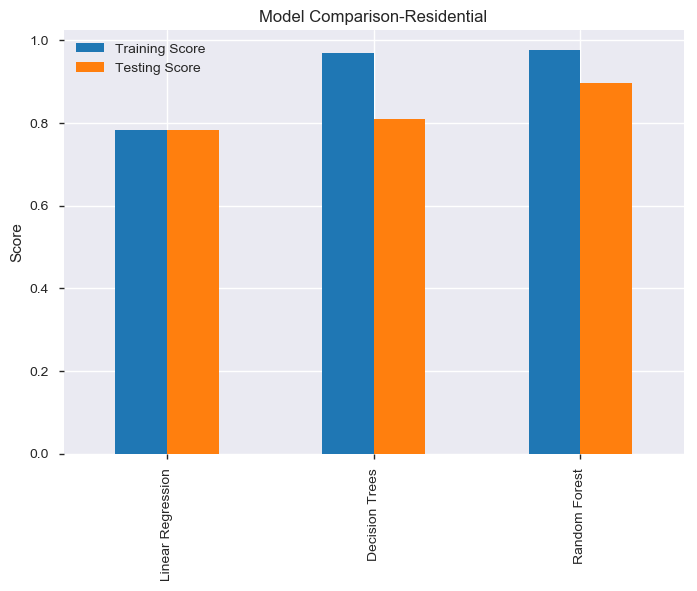

In [213]:
plt.figure(figsize = (30, 30))
score_summary.plot.bar(width=0.5)
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.title('Model Comparison-Residential')
plt.savefig('Model Comparison.png')

## Tuning the Parameters

In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [12,16,20],'n_estimators':[15],'max_features':[5,10]},
  ]

In [215]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [12, 16, 20], 'n_estimators': [15], 'max_features': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [216]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 10, 'n_estimators': 15}

In [217]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

172914.8163337599 {'max_depth': 12, 'max_features': 5, 'n_estimators': 15}
149181.7651833878 {'max_depth': 12, 'max_features': 10, 'n_estimators': 15}
160108.6499546389 {'max_depth': 16, 'max_features': 5, 'n_estimators': 15}
141222.11237706552 {'max_depth': 16, 'max_features': 10, 'n_estimators': 15}
157898.76060691266 {'max_depth': 20, 'max_features': 5, 'n_estimators': 15}
139786.08143115172 {'max_depth': 20, 'max_features': 10, 'n_estimators': 15}


In [218]:
df_grid_search1=pd.DataFrame(grid_search.cv_results_)
df_grid_search1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.575649,0.078471,0.028523,0.004911,12,5,15,"{'max_depth': 12, 'max_features': 5, 'n_estima...",-3.069238e+10,-2.828309e+10,...,-2.989953e+10,1.008016e+09,6,-2.063527e+10,-2.048122e+10,-2.187584e+10,-1.959373e+10,-2.013947e+10,-2.054511e+10,7.553451e+08
1,0.935977,0.037022,0.028730,0.002776,12,10,15,"{'max_depth': 12, 'max_features': 10, 'n_estim...",-2.263360e+10,-2.079879e+10,...,-2.225520e+10,9.318702e+08,3,-1.275595e+10,-1.320535e+10,-1.329813e+10,-1.347972e+10,-1.298033e+10,-1.314390e+10,2.520286e+08
2,0.767577,0.073363,0.040063,0.002171,16,5,15,"{'max_depth': 16, 'max_features': 5, 'n_estima...",-2.724082e+10,-2.459625e+10,...,-2.563478e+10,1.133684e+09,5,-9.958123e+09,-9.556045e+09,-9.780342e+09,-9.614042e+09,-9.561592e+09,-9.694029e+09,1.550307e+08
3,1.280781,0.086394,0.040496,0.001851,16,10,15,"{'max_depth': 16, 'max_features': 10, 'n_estim...",-2.067153e+10,-1.823632e+10,...,-1.994369e+10,9.371866e+08,2,-5.777347e+09,-6.041068e+09,-6.118428e+09,-6.058598e+09,-6.322559e+09,-6.063600e+09,1.746652e+08
4,0.972599,0.038052,0.060642,0.008538,20,5,15,"{'max_depth': 20, 'max_features': 5, 'n_estima...",-2.488660e+10,-2.448202e+10,...,-2.493202e+10,3.806553e+08,4,-5.605540e+09,-5.761679e+09,-5.814936e+09,-5.725188e+09,-5.696622e+09,-5.720793e+09,6.988745e+07
5,1.557228,0.070479,0.051266,0.004066,20,10,15,"{'max_depth': 20, 'max_features': 10, 'n_estim...",-2.022264e+10,-1.856941e+10,...,-1.954015e+10,6.880186e+08,1,-3.834906e+09,-3.886887e+09,-3.913605e+09,-3.913824e+09,-3.879054e+09,-3.885655e+09,2.896644e+07


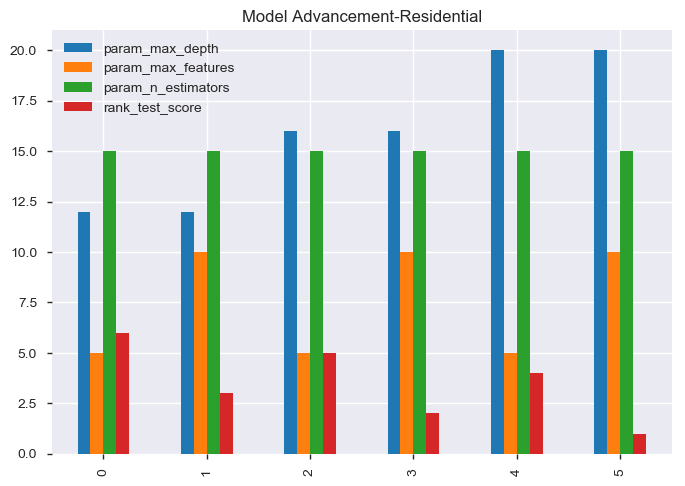

In [219]:
summary_grid_search1 = pd.DataFrame(df_grid_search1, columns = ['param_max_depth', 'param_max_features','param_n_estimators','rank_test_score'])
summary_grid_search1.plot.bar(width=0.5)
plt.legend(loc='upper left')
plt.title('Model Advancement-Residential')
plt.savefig('Model Advancement.png')

In [236]:
final_model = grid_search.best_estimator_

In [237]:
final_model.score(X_train,y_train)

0.9766180168486521

In [238]:
final_model.score(X_test,y_test)

0.8905733538752869

# Condominium Housing Analysis

First, visualize condominium housing price-location distribution. It is a clearly different pattern with residential housing. Most expensive housing are located at the center of the city. It proves the necessity to deal with these two group od data separately.

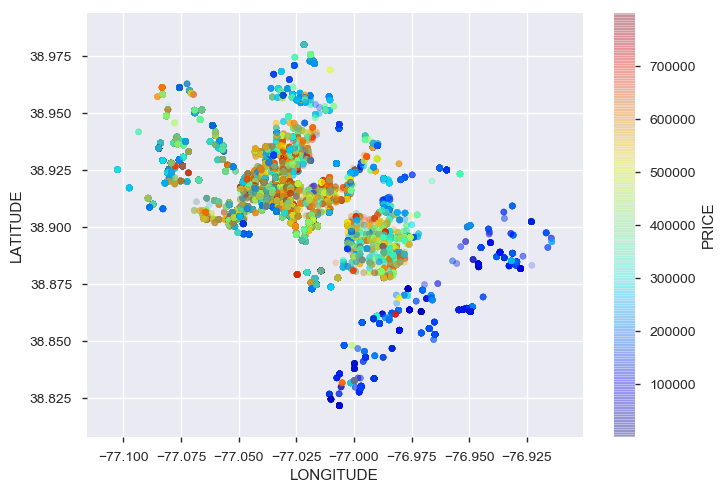

In [81]:
condominium[condominium['PRICE']<800000].plot(kind='scatter',x='LONGITUDE',y='LATITUDE',alpha=0.2,
              c='PRICE',cmap=plt.get_cmap('jet'),colorbar=True)

## Deal with Missing Data

Let's see how many missing value in this part.

In [82]:
condominium.count()

BATHRM        52261
HF_BATHRM     52261
HEAT          52261
AC            52261
ROOMS         52261
BEDRM         52261
AYB           52231
YR_RMDL       31649
EYB           52261
STORIES           0
PRICE         40316
QUALIFIED     52261
GBA               0
STRUCT            0
GRADE             0
CNDTN             0
EXTWALL       52261
ROOF              0
INTWALL           0
KITCHENS          0
FIREPLACES    52261
LANDAREA      52261
SOURCE        52261
CMPLX_NUM     52261
LIVING_GBA    52261
LATITUDE      52261
LONGITUDE     52261
WARD          52261
QUADRANT      52261
SALEYEAR      48004
dtype: int64

In [83]:
condominium.count()/len(condominium)

BATHRM        1.000000
HF_BATHRM     1.000000
HEAT          1.000000
AC            1.000000
ROOMS         1.000000
BEDRM         1.000000
AYB           0.999426
YR_RMDL       0.605595
EYB           1.000000
STORIES       0.000000
PRICE         0.771436
QUALIFIED     1.000000
GBA           0.000000
STRUCT        0.000000
GRADE         0.000000
CNDTN         0.000000
EXTWALL       1.000000
ROOF          0.000000
INTWALL       0.000000
KITCHENS      0.000000
FIREPLACES    1.000000
LANDAREA      1.000000
SOURCE        1.000000
CMPLX_NUM     1.000000
LIVING_GBA    1.000000
LATITUDE      1.000000
LONGITUDE     1.000000
WARD          1.000000
QUADRANT      1.000000
SALEYEAR      0.918543
dtype: float64

As mentioned before, some attributes are only for residential data, and these columns can be discarded in this part.

In [85]:
#delete empty information

condominium= condominium.drop(['STORIES','GBA','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS'], axis=1)

Then discard those data without a price.

In [88]:
condominium.dropna(subset=['PRICE'],inplace=True)
condominium.count()/len(condominium)

BATHRM        1.000000
HF_BATHRM     1.000000
HEAT          1.000000
AC            1.000000
ROOMS         1.000000
BEDRM         1.000000
AYB           0.999578
YR_RMDL       0.606633
EYB           1.000000
PRICE         1.000000
QUALIFIED     1.000000
FIREPLACES    1.000000
LANDAREA      1.000000
SOURCE        1.000000
CMPLX_NUM     1.000000
LIVING_GBA    1.000000
LATITUDE      1.000000
LONGITUDE     1.000000
WARD          1.000000
QUADRANT      1.000000
SALEYEAR      1.000000
dtype: float64

Conduct the same method to deal with missing values. Here we can see the mean of AYB in these two data set are quite different too. Another supportive evidence for our separating.

In [89]:
np.mean(condominium['AYB'])

1959.7116801905754

In [90]:
condominium['AYB'].fillna(1960,inplace=True)

Use the average gap between YR_RMDL and EYB to calculated missing YR_RMDL.

In [91]:
cal_rmd2 = condominium.loc[:,('YR_RMDL','EYB')]
cal_rmd2.count()

YR_RMDL    24457
EYB        40316
dtype: int64

In [92]:
cal_rmd2.dropna(how='any',inplace=True)
cal_rmd2.count()

YR_RMDL    24457
EYB        24457
dtype: int64

In [93]:
cal_rmd2['ratio'] = cal_rmd2['YR_RMDL'] - cal_rmd2['EYB']
np.mean(cal_rmd2['ratio'])

52.373880688555424

In [94]:
condominium['YR_RMDL'].fillna(0,inplace=True)
for i in range(len(condominium)):
    if condominium.iloc[i,7] == 0:
        if condominium.iloc[i,8] > 1965:
            condominium.iloc[i,7] == 2017
        else:
            condominium.iloc[i,7] == condominium.iloc[i,8]+52

In [95]:
condominium.count()/len(condominium)

BATHRM        1.0
HF_BATHRM     1.0
HEAT          1.0
AC            1.0
ROOMS         1.0
BEDRM         1.0
AYB           1.0
YR_RMDL       1.0
EYB           1.0
PRICE         1.0
QUALIFIED     1.0
FIREPLACES    1.0
LANDAREA      1.0
SOURCE        1.0
CMPLX_NUM     1.0
LIVING_GBA    1.0
LATITUDE      1.0
LONGITUDE     1.0
WARD          1.0
QUADRANT      1.0
SALEYEAR      1.0
dtype: float64

All missing values are filled.

## Deal with extreme noise

In [101]:
np.percentile(condominium['PRICE'],1)

39000.0

In [102]:
np.percentile(condominium['PRICE'],99)

12780000.0

In [103]:
condominium = condominium[condominium['PRICE']<12780000]
condominium = condominium[condominium['PRICE']>39000]

## Sparsify Catergorical Features

In [104]:
condominium_spar = pd.get_dummies(condominium)

# Create Train and Test Set

In [105]:
con_X = condominium_spar.drop('PRICE',axis=1)
con_y = condominium_spar['PRICE']

con_X_train, con_X_test, con_y_train, con_y_test = train_test_split(con_X, con_y, test_size=0.2, random_state=0)

In [106]:
len(con_X_train)/len(condominium_spar)

0.7999898690575691

# Modelling and Evaluation

### Linear Regression

In [107]:
lin_reg2 = LinearRegression()
lin_reg2.fit(con_X_train, con_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
lin_reg2_score1=lin_reg2.score(con_X_train,con_y_train)
lin_reg2_score1

0.4090823488249953

In [221]:
lin_reg2_score2=lin_reg2.score(con_X_test,con_y_test)
lin_reg2_score2

0.4253068773751706

In [109]:
lin2_train_pred = lin_reg2.predict(con_X_train)
lin2_mse = mean_squared_error(con_y_train, lin2_train_pred)
lin2_rmse = np.sqrt(lin2_mse)
lin2_rmse

304922.1498837001

In [110]:
lin2_mae = mean_absolute_error(con_y_train, lin2_train_pred)
lin2_mae

134639.61549144113

### Decision Tree Regressor

In [111]:
tree_reg2 = DecisionTreeRegressor(max_depth=15,random_state=42)
tree_reg2.fit(con_X_train, con_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [222]:
tree_reg2_score1=tree_reg2.score(con_X_train,con_y_train)
tree_reg2_score1

0.9508407201704046

In [223]:
tree_reg2_score2=tree_reg2.score(con_X_test,con_y_test)
tree_reg2_score2

0.6985415292454044

In [113]:
dt2_train_pred = tree_reg2.predict(con_X_train)
dt2_mse = mean_squared_error(con_y_train, dt2_train_pred)
dt2_rmse = np.sqrt(dt2_mse)
dt2_rmse

87948.46170666294

In [114]:
dt2_mae = mean_absolute_error(con_y_train, dt2_train_pred)
dt2_mae

43712.33300318173

### Random Forest Regressor

In [115]:
forest_reg2 = RandomForestRegressor(max_depth=17,n_estimators=15,random_state=0)
forest_reg2.fit(con_X_train,con_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [224]:
forest_reg2_score1=forest_reg2.score(con_X_train,con_y_train)
forest_reg2_score1

0.9542204569873493

In [225]:
forest_reg2_score2=forest_reg2.score(con_X_test,con_y_test)
forest_reg2_score2

0.8211585477557648

In [117]:
rf2_train_pred = forest_reg2.predict(con_X_train)
rf2_mse = mean_squared_error(con_y_train, rf2_train_pred)
rf2_rmse = np.sqrt(rf2_mse)
rf2_rmse

84871.3710929492

In [118]:
rf2_mae = mean_absolute_error(con_y_train, rf2_train_pred)
rf2_mae

37528.695978643744

### Performance Comparison

In [226]:
score_summary2 = pd.DataFrame({'Training Score':[lin_reg2_score1,tree_reg2_score1,forest_reg2_score1],
                           'Testing Score':[lin_reg2_score2,tree_reg2_score2,forest_reg2_score2]},
                          index=['Linear Regression','Decision Trees','Random Forest'])
score_summary2

,Training Score,Testing Score
Linear Regression,0.409082,0.425307
Decision Trees,0.950841,0.698542
Random Forest,0.954220,0.821159


<Figure size 3000x3000 with 0 Axes>

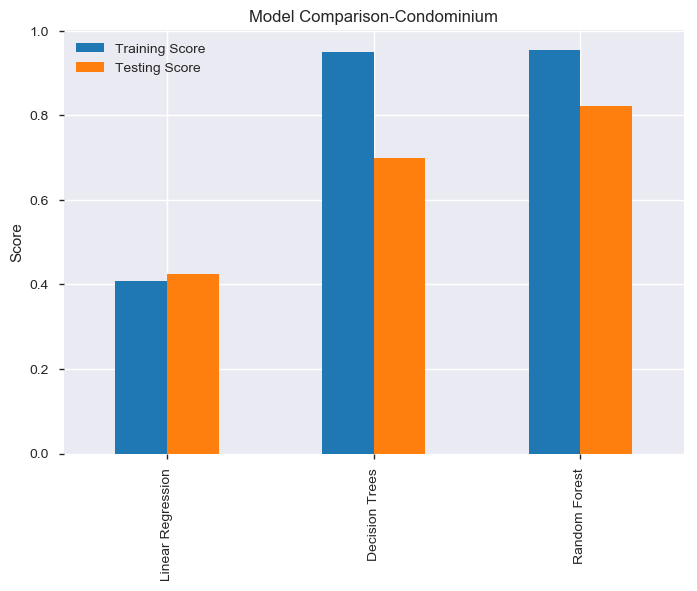

In [227]:
plt.figure(figsize = (30, 30))
score_summary2.plot.bar(width=0.5)
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.title('Model Comparison-Condominium')
plt.savefig('Model Comparison.png')

## Tuning the Parameters

In [228]:
param_grid = [
     {'max_depth': [12,16,20],'n_estimators':[15],'max_features':[5,10]},
  ]

In [229]:
grid_search2 = GridSearchCV(forest_reg2, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search2.fit(con_X_train,con_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [12, 16, 20], 'n_estimators': [15], 'max_features': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [230]:
grid_search2.best_params_

{'max_depth': 20, 'max_features': 5, 'n_estimators': 15}

In [231]:
cvres2 = grid_search2.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

185250.0418911465 {'max_depth': 12, 'max_features': 5, 'n_estimators': 15}
172807.96998508988 {'max_depth': 12, 'max_features': 10, 'n_estimators': 15}
161755.46150555866 {'max_depth': 16, 'max_features': 5, 'n_estimators': 15}
161037.8296416836 {'max_depth': 16, 'max_features': 10, 'n_estimators': 15}
158538.48408994003 {'max_depth': 20, 'max_features': 5, 'n_estimators': 15}
160208.76488587115 {'max_depth': 20, 'max_features': 10, 'n_estimators': 15}


In [232]:
df_grid_search2=pd.DataFrame(grid_search2.cv_results_)
df_grid_search2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.347072,0.009163,0.015164,0.001469,12,5,15,"{'max_depth': 12, 'max_features': 5, 'n_estima...",-2.564902e+10,-3.648829e+10,...,-3.431758e+10,4.538550e+09,6,-2.042241e+10,-2.221272e+10,-2.029828e+10,-2.329823e+10,-2.074358e+10,-2.139504e+10,1.171666e+09
1,0.652079,0.035517,0.019513,0.007194,12,10,15,"{'max_depth': 12, 'max_features': 10, 'n_estim...",-2.289788e+10,-3.118283e+10,...,-2.986259e+10,3.883894e+09,5,-1.476363e+10,-1.536794e+10,-1.511037e+10,-1.640868e+10,-1.524541e+10,-1.537921e+10,5.530020e+08
2,0.496871,0.052448,0.022207,0.000973,16,5,15,"{'max_depth': 16, 'max_features': 5, 'n_estima...",-1.987368e+10,-2.698482e+10,...,-2.616483e+10,3.282609e+09,4,-8.734074e+09,-8.745232e+09,-9.295591e+09,-9.960144e+09,-8.856339e+09,-9.118276e+09,4.680952e+08
3,0.860098,0.028603,0.023139,0.001166,16,10,15,"{'max_depth': 16, 'max_features': 10, 'n_estim...",-1.919009e+10,-2.815278e+10,...,-2.593318e+10,3.971438e+09,3,-6.429444e+09,-7.614171e+09,-7.589141e+09,-7.789852e+09,-7.948937e+09,-7.474309e+09,5.383920e+08
4,0.606502,0.057015,0.030322,0.005606,20,5,15,"{'max_depth': 20, 'max_features': 5, 'n_estima...",-1.799929e+10,-2.722178e+10,...,-2.513445e+10,4.650759e+09,1,-5.236241e+09,-6.051577e+09,-5.924329e+09,-6.583306e+09,-6.104219e+09,-5.979934e+09,4.337761e+08
5,0.997116,0.012459,0.031315,0.006001,20,10,15,"{'max_depth': 20, 'max_features': 10, 'n_estim...",-1.839754e+10,-2.884875e+10,...,-2.566685e+10,4.338161e+09,2,-4.843068e+09,-5.590036e+09,-5.754318e+09,-5.908930e+09,-5.472409e+09,-5.513752e+09,3.664378e+08


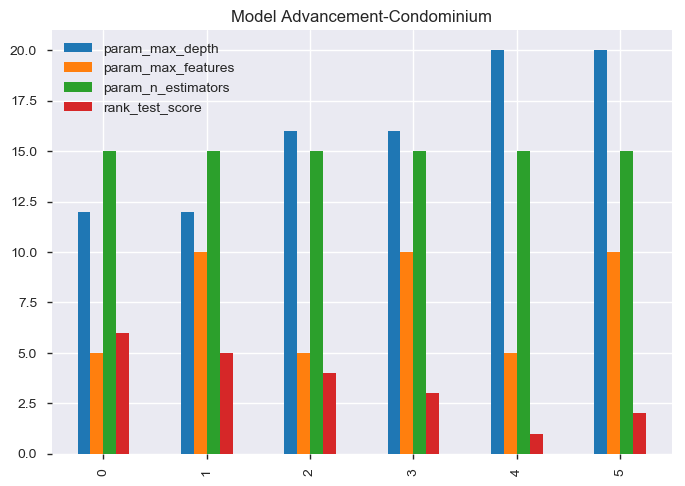

In [233]:
summary_grid_search2 = pd.DataFrame(df_grid_search2, columns = ['param_max_depth', 'param_max_features','param_n_estimators','rank_test_score'])
summary_grid_search2.plot.bar(width=0.5)
plt.legend(loc='upper left')
plt.title('Model Advancement-Condominium')
plt.savefig('Model Advancement.png')

In [234]:
final_model2 = grid_search2.best_estimator_

In [235]:
final_model2.score(con_X_test,con_y_test)

0.8360033690550206

# Take out of the Analysis

In [203]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod1 = ols('PRICE ~ SOURCE',data=data_cleaned).fit()
aov_table1 = sm.stats.anova_lm(mod1, typ=2)
aov_table1

,sum_sq,df,F,PR(>F)
SOURCE,1.742148e+16,1.0,350.635514,4.218049e-78
Residual,4.879805e+18,98214.0,NaN,NaN


we use Analysis of Variance test(ANOVA). We can find that the P-value is extremely small, which is almost close to 0. Thus, Residential and Condominium are significantly different, which means we will consider them separately.

Text(0.5, 1.0, 'Relative Importance')

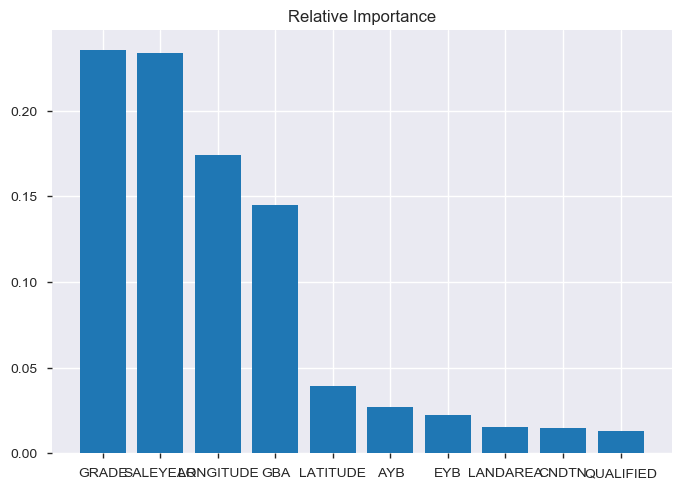

In [148]:
fig,ax = plt.subplots()
importance = final_model.feature_importances_
importance_df = pd.DataFrame(importance, columns=['Importance'], index=X_train.columns)
importance_df.sort_values(by = 'Importance', 
                 inplace = True, 
                 ascending = False)
ax.bar(importanceortance_df.index[0:10],importanceortance_df['Importance'][0:10])
ax.set_title('Relative Importance')

we selected top 10 factors that influence the pric. Regarding Residential Housing, grade is the most important factor, as we can see in the graph. Salesyear, however, cannot be considered in this analysis since it relies largely on the market situation. Another very important factor is Location, which can be shown as longitude and latitude in this graph.

In [149]:
importance_df.head(10)

,Importance
GRADE,0.235245
SALEYEAR,0.233809
LONGITUDE,0.174239
GBA,0.144802
LATITUDE,0.039592
AYB,0.027077
EYB,0.022613
LANDAREA,0.015165
CNDTN,0.015074
QUALIFIED,0.013119


Text(0.5, 1.0, 'Relative Importance')

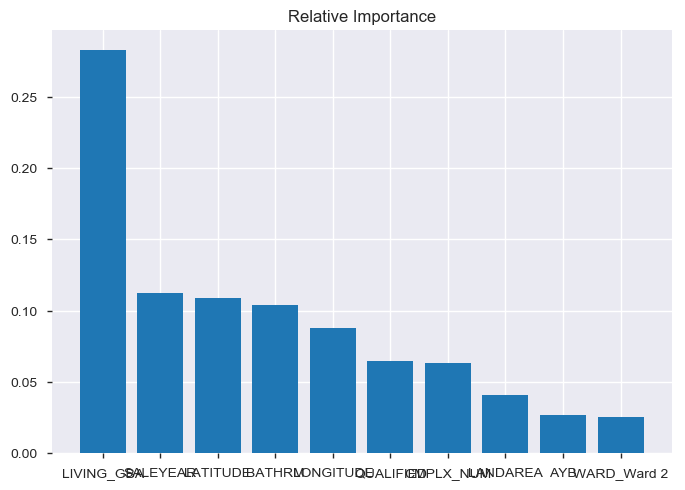

In [144]:
fig2,ax2 = plt.subplots()
con_importance = final_model2.feature_importances_
con_importance_df = pd.DataFrame(con_importance, columns=['Importance'], index=con_X_train.columns)
con_importance_df.sort_values(by = 'Importance', 
                 inplace = True, 
                 ascending = False)
ax2.bar(con_importance_df.index[0:10],con_importanceortance_df['Importance'][0:10])
ax2.set_title('Relative Importance')

Regarding Condominium housing, the Gross building area is the most fundamental one.

In [146]:
con_importance_df.head(10)

,Importance
LIVING_GBA,0.282754
SALEYEAR,0.112279
LATITUDE,0.108903
BATHRM,0.104259
LONGITUDE,0.088210
QUALIFIED,0.064959
CMPLX_NUM,0.063081
LANDAREA,0.041230
AYB,0.026970
WARD_Ward 2,0.025276


In [153]:
residential['PricePerSqFeet'] = residential['PRICE']/residential['GBA']

In [182]:
NE_residential = residential[residential['QUADRANT']=='NE'].groupby(['SALEYEAR']).median()
SE_residential = residential[residential['QUADRANT']=='SE'].groupby(['SALEYEAR']).median()
NW_residential = residential[residential['QUADRANT']=='NW'].groupby(['SALEYEAR']).median()
SW_residential = residential[residential['QUADRANT']=='SW'].groupby(['SALEYEAR']).median()

In [183]:
NW_residential = NW_residential.drop(1991.0,axis=0)

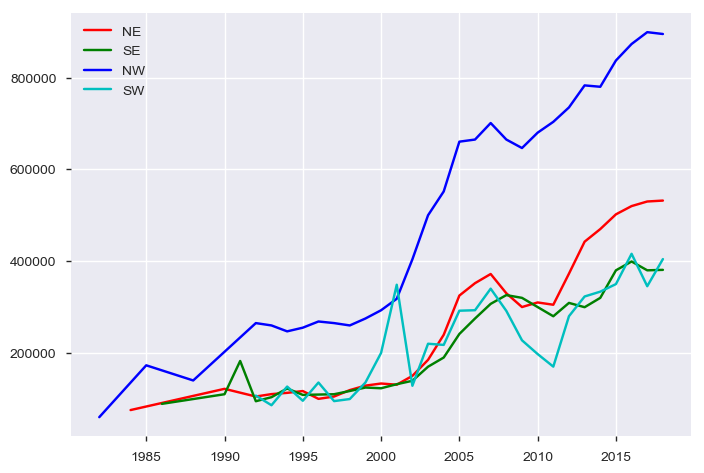

In [184]:
plt.plot(NE_residential.index,NE_residential['PRICE'],color='r',label='NE')
plt.plot(SE_residential.index,SE_residential['PRICE'],color='g',label='SE')
plt.plot(NW_residential.index,NW_residential['PRICE'],color='b',label='NW')
plt.plot(SW_residential.index,SW_residential['PRICE'],color='c',label='SW')
plt.legend()

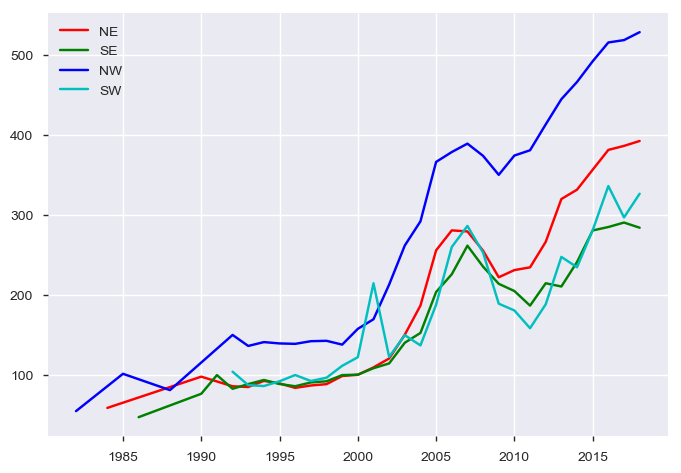

In [186]:
plt.plot(NE_residential.index,NE_residential['PricePerSqFeet'],color='r',label='NE')
plt.plot(SE_residential.index,SE_residential['PricePerSqFeet'],color='g',label='SE')
plt.plot(NW_residential.index,NW_residential['PricePerSqFeet'],color='b',label='NW')
plt.plot(SW_residential.index,SW_residential['PricePerSqFeet'],color='c',label='SW')
plt.legend()

In [200]:
NE_condominium = condominium[condominium['QUADRANT']=='NE'].groupby(['SALEYEAR']).median()
SE_condominium = condominium[condominium['QUADRANT']=='SE'].groupby(['SALEYEAR']).median()
NW_condominium = condominium[condominium['QUADRANT']=='NW'].groupby(['SALEYEAR']).median()
SW_condominium = condominium[condominium['QUADRANT']=='SW'].groupby(['SALEYEAR']).median()

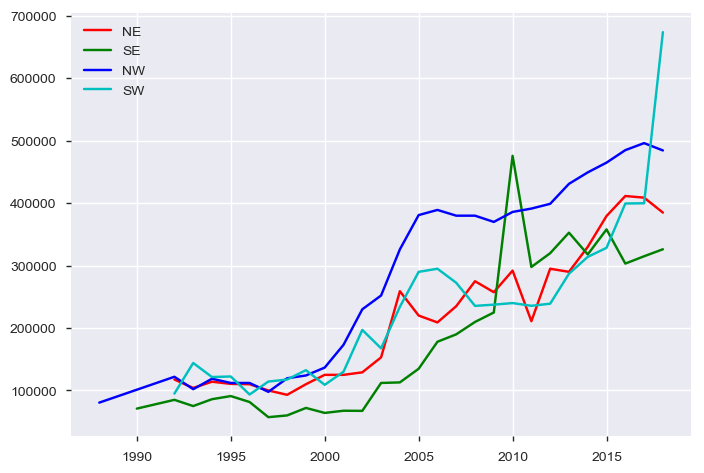

In [201]:
plt.plot(NE_condominium.index,NE_condominium['PRICE'],color='r',label='NE')
plt.plot(SE_condominium.index,SE_condominium['PRICE'],color='g',label='SE')
plt.plot(NW_condominium.index,NW_condominium['PRICE'],color='b',label='NW')
plt.plot(SW_condominium.index,SW_condominium['PRICE'],color='c',label='SW')
plt.legend()

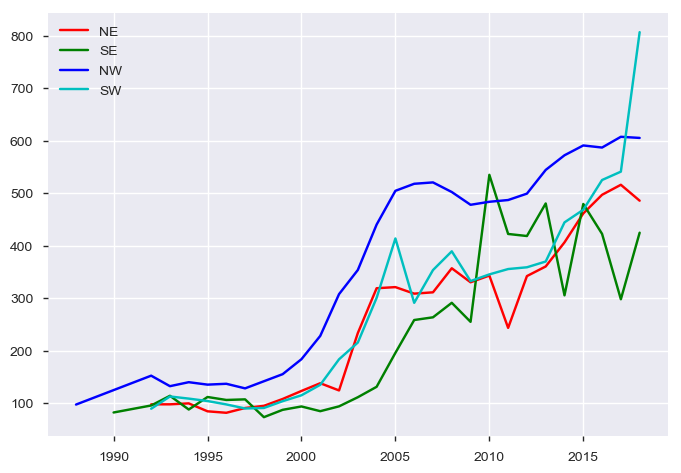

In [202]:
plt.plot(NE_condominium.index,NE_condominium['PricePerSqFeet'],color='r',label='NE')
plt.plot(SE_condominium.index,SE_condominium['PricePerSqFeet'],color='g',label='SE')
plt.plot(NW_condominium.index,NW_condominium['PricePerSqFeet'],color='b',label='NW')
plt.plot(SW_condominium.index,SW_condominium['PricePerSqFeet'],color='c',label='SW')
plt.legend()

In [188]:
residential_by_yr = residential.groupby(['SALEYEAR']).median()
condominium_by_yr = condominium.groupby(['SALEYEAR']).median()

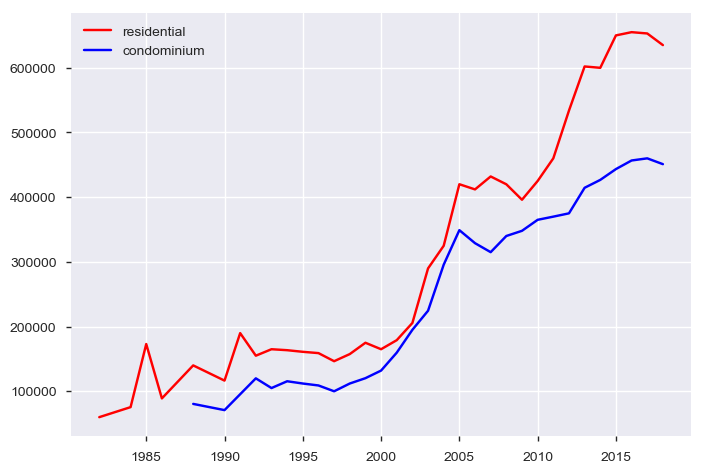

In [190]:
plt.plot(residential_by_yr.index,residential_by_yr['PRICE'],color='r',label='residential')
plt.plot(condominium_by_yr.index,condominium_by_yr['PRICE'],color='b',label='condominium')
plt.legend()

In [191]:
condominium['PricePerSqFeet'] = condominium['PRICE']/condominium['LIVING_GBA']
condominium_by_yr = condominium.groupby(['SALEYEAR']).median()

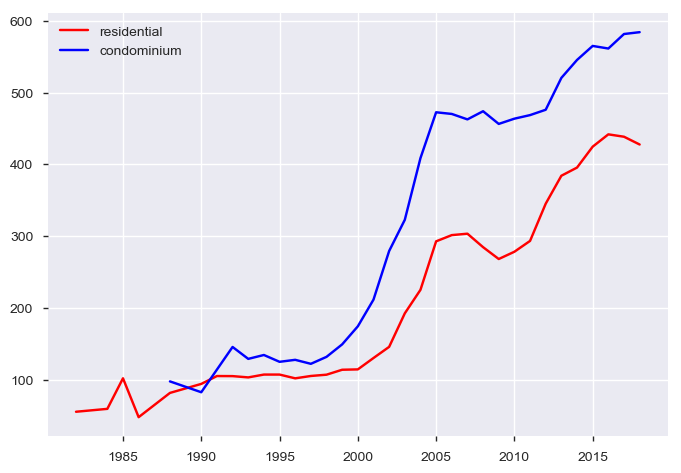

In [192]:
plt.plot(residential_by_yr.index,residential_by_yr['PricePerSqFeet'],color='r',label='residential')
plt.plot(condominium_by_yr.index,condominium_by_yr['PricePerSqFeet'],color='b',label='condominium')
plt.legend()